

### Introduction

The evolution of chatbots has revolutionized the way we interact with technology, providing a more natural and interactive means of communication. One of the most exciting developments in this domain has been the integration of artificial intelligence to create intelligent chatbots that can understand and respond to user queries in a conversational manner.

This project aims to design and implement a generative-based chatbot using state-of-the-art architectures and techniques. The primary objective is to build a chatbot that can carry out multi-turn conversations, adapt to context, and handle a variety of topics, with a focus on question-and-answer-style interactions.

The dataset chosen for this project is the Stanford Question Answering Dataset (SQuAD), a popular dataset in the natural language processing community. SQuAD consists of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text from the corresponding reading passage.

For the model architecture, we have decided to utilize BART (Bidirectional and Auto-Regressive Transformers), a powerful transformer-based model known for its effectiveness in sequence-to-sequence tasks, including text generation and question-answering.

The steps we will follow to achieve our goal include:

1. Data Cleaning and Preparation
2. Exploratory Data Analysis
3. Model Selection
4. Model Training
5. Model Analysis
6. Conclusion and Evaluation

The final output of this project will be a fully functional chatbot capable of accurately responding to user queries in a conversational manner. Evaluation metrics such as BLEU Score and ROUGE Scores will be employed, with a focus on the SacreBLEU implementation, to quantitatively assess the performance of the chatbot.

The project report will detail the challenges faced, solutions implemented, model architecture, evaluation results, and user feedback, followed by potential future improvements and scalability options.

With this introduction in place, we are now ready to move on to Step 2: Data Cleaning and Preparation. Let me know if you're ready to proceed!

 ## Data Cleaning and Preparation

In this step, we will perform the following tasks:

Load the Dataset:
 Load the SQuAD dataset files.

Data Inspection:
Inspect the data to understand its structure and content.
Data Cleaning:Clean and preprocess the data to make it suitable for training the model.

Data Transformation:
Transform the data into a format that can be used to train the BART model.

**Loading data:**

In [2]:
import json

# Load the SQuAD dataset files
file_paths = ['train-v1.1.json', 'dev-v1.1.json']

# Load and inspect the structure of the training dataset
with open(file_paths[0]) as file:
    train_data = json.load(file)

# Show the keys at the top level of the JSON structure
train_data.keys()


dict_keys(['data', 'version'])

**Data Inspection:**

In [3]:
# Inspect the structure of the "data" key
train_data['data'][0].keys(), train_data['data'][0]['title'], train_data['data'][0]['paragraphs'][0].keys()


(dict_keys(['title', 'paragraphs']),
 'University_of_Notre_Dame',
 dict_keys(['context', 'qas']))

The structure under the "data" key is as follows:

**title**: This key contains the title of the article or section.

**paragraphs**: This key contains a list of paragraphs, where each paragraph has the following structure:

*   **context:** This key contains the text of the paragraph.

*   **qas:** This key contains a list of question-answer pairs related to the paragraph, where each question-answer pair has the following structure:

1.   **question**: The question text.
2.   **answers**: A list of possible answers to the question, where each answer has the following structure:

*   **text**: The answer text.

*   **answer_start**: The starting index of the answer in the paragraph context.

**Data Transformation:**

First, we'll start by Extracting Question-Answer Pairs:

Here, we will Extract question-answer pairs and their corresponding contexts from the dataset.

In [4]:
# Extracting Question-Answer Pairs and Contexts

questions = []
answers = []
contexts = []

for article in train_data['data']:
    for paragraph in article['paragraphs']:
        context = paragraph['context']
        for qa in paragraph['qas']:
            question = qa['question']
            for answer in qa['answers']:
                questions.append(question)
                answers.append(answer['text'])
                contexts.append(context)

# Display the first few question-answer pairs and their contexts
questions[:5], answers[:5], contexts[:5]


(['To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
  'What is in front of the Notre Dame Main Building?',
  'The Basilica of the Sacred heart at Notre Dame is beside to which structure?',
  'What is the Grotto at Notre Dame?',
  'What sits on top of the Main Building at Notre Dame?'],
 ['Saint Bernadette Soubirous',
  'a copper statue of Christ',
  'the Main Building',
  'a Marian place of prayer and reflection',
  'a golden statue of the Virgin Mary'],
 ['Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared 

We have successfully extracted the question-answer pairs and their corresponding contexts from the dataset.

Next, we will proceed with handling any missing values in the dataset. Let's check for any missing values in the extracted data.

In [5]:
# Check for missing values in the extracted data
missing_questions = sum(1 for q in questions if q is None or q == '')
missing_answers = sum(1 for a in answers if a is None or a == '')
missing_contexts = sum(1 for c in contexts if c is None or c == '')

missing_questions, missing_answers, missing_contexts


(0, 0, 0)

Looking at our results it seems that there are no missing values in the extracted data.


Next we will proceed with preprocessing the extracted data.

Preprocessing is the process of converting text into a format that can be easily processed by machine learning models. In this step, we will use a tokenizer suitable for the BART model to convert the text data into tokens.

**Tokenization**

For tokenization, we will use the tokenizer provided by the Hugging Face Transformers library, which is specifically designed for the BART model. The tokenizer will convert the text data into tokens, which are numerical representations of words or subwords. These tokens can then be used as input for the BART model.

In [6]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.8 MB/s eta 0:00:00


In [7]:
from transformers import BartTokenizer

# Load the BART tokenizer
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')

# Tokenize the text data
inputs = tokenizer(questions, answers, max_length=512, truncation=True, padding='max_length', return_tensors='pt')

# Display the tokenized data
print(inputs)


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


{'input_ids': tensor([[    0,  3972,  2661,  ...,     1,     1,     1],
        [    0,  2264,    16,  ...,     1,     1,     1],
        [    0,   133, 26429,  ...,     1,     1,     1],
        ...,
        [    0,  3908,    99,  ...,     1,     1,     1],
        [    0,  1121,    99,  ...,     1,     1,     1],
        [    0,  2264,    16,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


## Exploratory Data Analysis

In this step, we will perform exploratory data analysis (EDA) to understand the characteristics of the dataset. EDA helps us to uncover patterns, insights, and relationships in the data, which can inform our model training and evaluation.

**Distribution of Question Lengths**

We'll start by analyzing the distribution of the number of words in the questions. This will give us an understanding of how concise or detailed the questions in the dataset are.

In [7]:
pip install nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


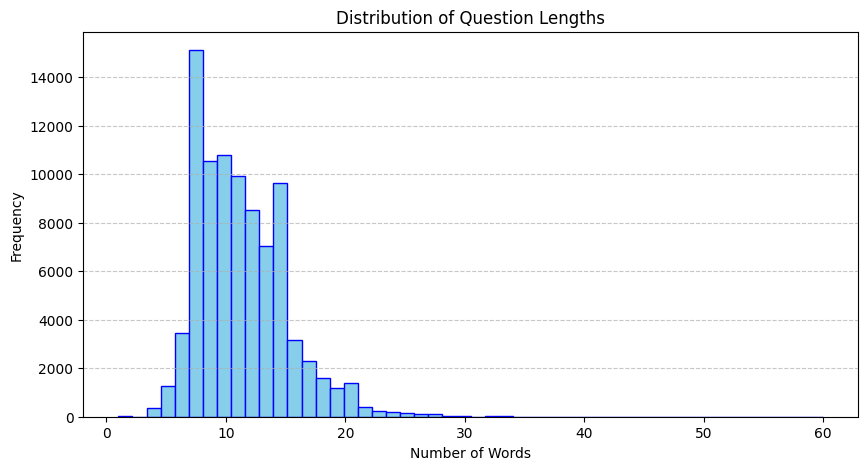

In [8]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Download the NLTK data (if not already downloaded)
nltk.download('punkt')

# Tokenize the questions into words
question_words = [word_tokenize(q) for q in questions]

# Calculate the length of each question
question_lengths = [len(q) for q in question_words]

# Plot the distribution of question lengths
plt.figure(figsize=(10, 5))
plt.hist(question_lengths, bins=50, color='skyblue', edgecolor='blue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


It looks like the majority of questions in the dataset have lengths between 8 to 14 words, with a peak at around 10 to 11 words. This indicates that most questions are fairly concise.

Distribution of Answer Lengths

Next, we'll analyze the distribution of the number of words in the answers. This will give us an understanding of how concise or detailed the answers in the dataset are.

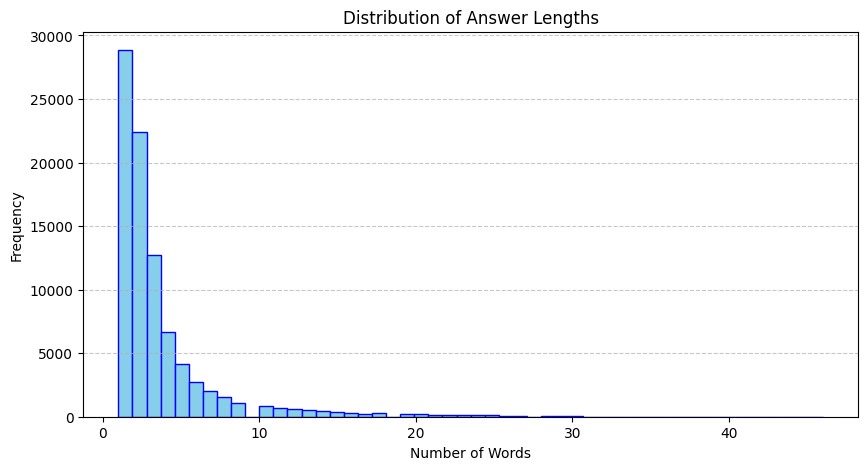

In [9]:
# Tokenize the answers into words
answer_words = [word_tokenize(a) for a in answers]

# Calculate the length of each answer
answer_lengths = [len(a) for a in answer_words]

# Plot the distribution of answer lengths
plt.figure(figsize=(10, 5))
plt.hist(answer_lengths, bins=50, color='skyblue', edgecolor='blue')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 It looks like most of the answers are quite concise, with a majority having less than 10 words.

Distribution of Context Lengths

Now, we will analyze the distribution of the number of words in the contexts. This will give us an understanding of how detailed the contexts in the dataset are.

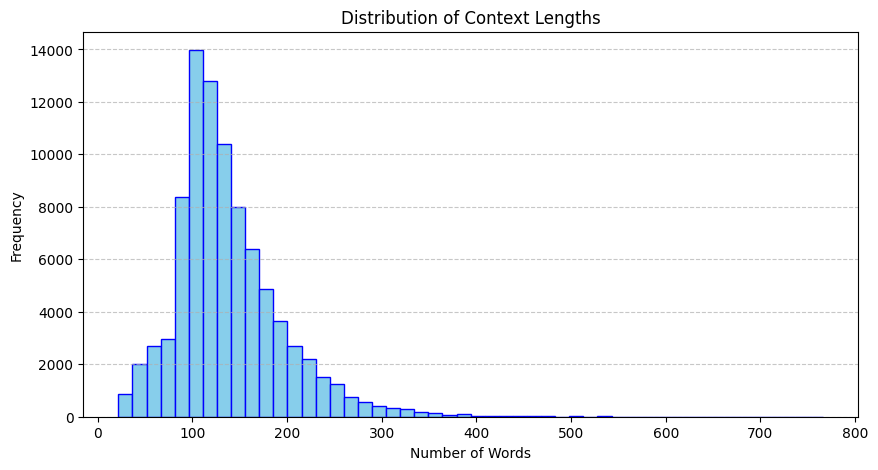

In [10]:
# Tokenize the contexts into words
context_words = [word_tokenize(c) for c in contexts]

# Calculate the length of each context
context_lengths = [len(c) for c in context_words]

# Plot the distribution of context lengths
plt.figure(figsize=(10, 5))
plt.hist(context_lengths, bins=50, color='skyblue', edgecolor='blue')
plt.title('Distribution of Context Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


It seems that the contexts have a wide range of lengths, with some being quite short and others being much longer. The avrage centralisig between 100 and 200 words.

Common Words

In this analysis, we'll identify the most common words in the questions, answers, and contexts. This will help us understand the key topics and themes in the dataset.

Question Word Cloud:


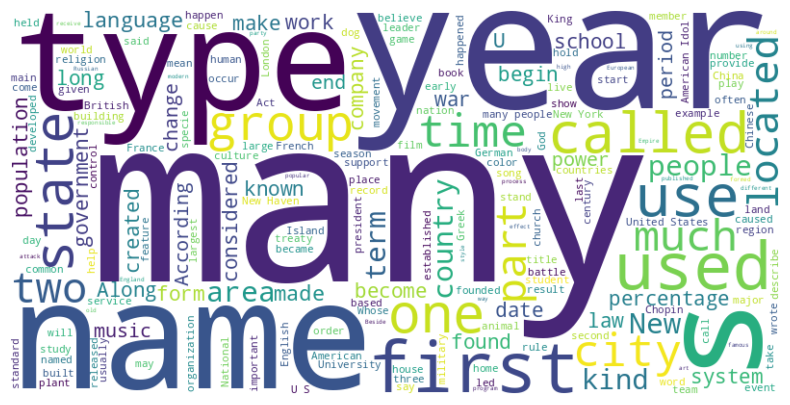

Answer Word Cloud:


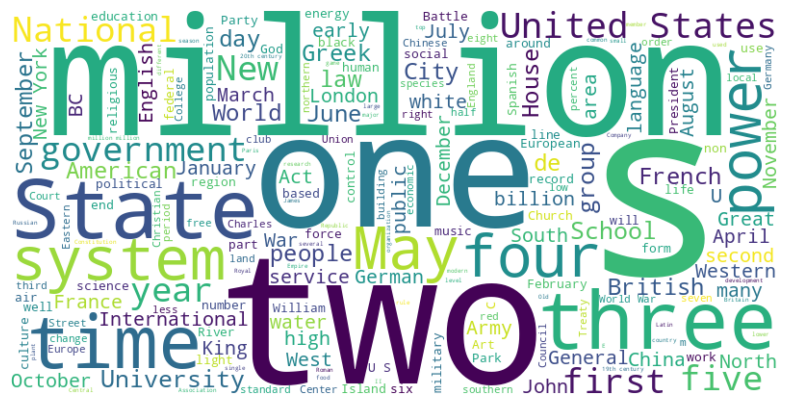

Context Word Cloud:


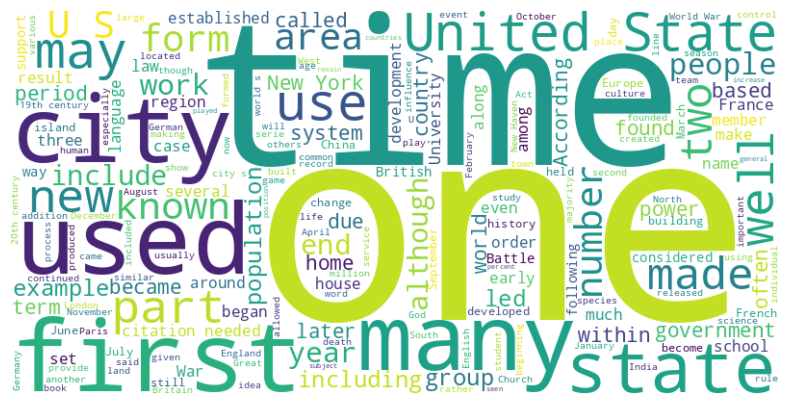

In [23]:
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_word_cloud(words_list):
    # Flatten the list of words
    words = [word for sublist in words_list for word in sublist]

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for questions, answers, and contexts
print("Question Word Cloud:")
generate_word_cloud(question_words)
print("Answer Word Cloud:")
generate_word_cloud(answer_words)
print("Context Word Cloud:")
generate_word_cloud(context_words)


The word clouds above provide a visual representation of the most common words in the questions, answers, and contexts. We can see that there are a variety of words in the dataset, including key topics and themes around date/time, states /countries and population.

## **Model Selection**

In this step, we will select a model architecture for our chatbot.

Given that we are building a question and answer style chatbot, we have selected the BART (Bidirectional and Auto-Regressive Transformers) model. BART is a powerful transformer-based model that is designed for sequence-to-sequence tasks, such as question answering, summarization, and translation.

The BART model has the ability to generate coherent and contextually relevant responses, making it an ideal choice for our chatbot.

We will use the pre-trained BART model provided by the Hugging Face Transformers library, and fine-tune it on our dataset to adapt it to the specific requirements of our chatbot.

## **Model Analysis**

we will fine-tune the BART model on our dataset and then evaluate its performance. Fine-tuning is the process of training a pre-trained model on a specific task to adapt it to the requirements of that task.

We will proceed witht The following steps:

**Fine-Tuning the Model:**

Load the pre-trained BART model from the Hugging Face Transformers library.

Fine-tune the model on our dataset.

**Evaluating the Model:**

Use the fine-tuned model to generate responses to questions.

Evaluate the model's performance using evaluation metrics such as BLEU and ROUGE scores.

In [9]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Load the pre-trained BART model and tokenizer
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')


Fine-tuning the model on our dataset involves training the model on our question-answer pairs. We will use the input questions as the input sequences and the corresponding answers as the target sequences. The model will learn to generate the correct answers given the input questions.

In [13]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW

class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }

# Define the training hyperparameters
batch_size = 16
learning_rate = 5e-5
num_epochs = 3
max_length = 512 # the standard maximum length should be enough condisdering
#                  during our EDA we found the context length to avrage 100 and 200 words.

# Prepare the dataset for training
dataset = QADataset(questions, answers, tokenizer, max_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

# Set up the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Move the model to the GPU
model = model.cuda()

# Set the model to training mode
model.train()

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for step , batch in enumerate(dataloader):
        # Move the batch to the GPU
        batch = {k: v.cuda() for k, v in batch.items()}

        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Print the loss every 100 steps
        if (step + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(dataloader)}, Loss: {loss.item()}')


    # Calculate the average loss for the epoch
    avg_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss}')


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Step 100/5475, Loss: 5.587644100189209
Epoch 1/3, Step 200/5475, Loss: 5.867802619934082
Epoch 1/3, Step 300/5475, Loss: 6.093409061431885
Epoch 1/3, Step 400/5475, Loss: 6.269181728363037
Epoch 1/3, Step 500/5475, Loss: 6.079386234283447
Epoch 1/3, Step 600/5475, Loss: 5.556622505187988
Epoch 1/3, Step 700/5475, Loss: 6.422446250915527
Epoch 1/3, Step 800/5475, Loss: 5.521266460418701
Epoch 1/3, Step 900/5475, Loss: 6.4770636558532715
Epoch 1/3, Step 1000/5475, Loss: 6.039799213409424
Epoch 1/3, Step 1100/5475, Loss: 5.891741752624512
Epoch 1/3, Step 1200/5475, Loss: 5.698702335357666
Epoch 1/3, Step 1300/5475, Loss: 5.638281345367432
Epoch 1/3, Step 1400/5475, Loss: 5.262135982513428
Epoch 1/3, Step 1500/5475, Loss: 5.8226094245910645
Epoch 1/3, Step 1600/5475, Loss: 5.571052074432373
Epoch 1/3, Step 1700/5475, Loss: 6.086193084716797
Epoch 1/3, Step 1800/5475, Loss: 6.11436653137207
Epoch 1/3, Step 1900/5475, Loss: 6.109163761138916
Epoch 1/3, Step 2000/5475, Loss: 6.3454

In [10]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.7 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import get_linear_schedule_with_warmup
import optuna

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameter tuning with Optuna
def objective(trial, model):
    # Define the hyperparameters to be tuned
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-6, 1e-4)
    num_epochs = 3

    # Prepare the dataset for training
    dataset = QADataset(questions, answers, tokenizer, max_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    # Set up the optimizer and loss function
    optimizer = AdamW(model.parameters(), lr=learning_rate)

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader) * num_epochs)

    # Move the model to the GPU
    model = model.to(device)

    # Set the model to training mode
    model.train()

    # Training loop
    total_loss = 0
    for epoch in range(num_epochs):
        for step, batch in enumerate(dataloader):
            # Move the batch to the GPU
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update the learning rate
            scheduler.step()

            total_loss += loss.item()

            # Print the loss every 100 steps
            if (step + 1) % 100 == 0:
              print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(dataloader)}, Loss: {loss.item()}')

    # Calculate the average loss for all epochs
    avg_loss = total_loss / (len(dataloader) * num_epochs)
    return avg_loss

# Run the hyperparameter tuning
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, model), n_trials=10)


# Print the best hyperparameters
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial
print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


In [46]:
import tensorflow as tf
tf.keras.backend.clear_session()
obj = None
torch.cuda.empty_cache()

In [47]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW
from sklearn.model_selection import train_test_split

class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }


# Define the training hyperparameters
batch_size = 16  # Optimal value from optimization
learning_rate = 1.593180931067222e-05  # Optimal value from optimization
num_epochs = 3
max_length = 512



# Split the dataset into training and validation sets
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions, answers, test_size=0.1, random_state=42
)


# Prepare the dataset for training
train_dataset = QADataset(questions_train, answers_train, tokenizer, max_length)
val_dataset = QADataset(questions_val, answers_val, tokenizer, max_length)  # Validation dataset

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)  # Validation dataloader

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Move the model to the GPU
model = model.cuda()

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for step, batch in enumerate(train_dataloader):
        batch = {k: v.cuda() for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        if (step + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(train_dataloader)}, Loss: {loss.item()}')

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for step, batch in enumerate(val_dataloader):
            batch = {k: v.cuda() for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {avg_val_loss}')

# Save the fine-tuned model
model.save_pretrained("path/to/save/model")
tokenizer.save_pretrained("path/to/save/tokenizer")


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Step 100/4928, Loss: 5.807984352111816
Epoch 1/3, Step 200/4928, Loss: 5.677043437957764
Epoch 1/3, Step 300/4928, Loss: 5.707094669342041
Epoch 1/3, Step 400/4928, Loss: 5.34266996383667
Epoch 1/3, Step 500/4928, Loss: 5.7273077964782715
Epoch 1/3, Step 600/4928, Loss: 6.160397052764893
Epoch 1/3, Step 700/4928, Loss: 5.8393402099609375
Epoch 1/3, Step 800/4928, Loss: 5.515448570251465
Epoch 1/3, Step 900/4928, Loss: 5.9149909019470215
Epoch 1/3, Step 1000/4928, Loss: 5.9002156257629395
Epoch 1/3, Step 1100/4928, Loss: 5.103499889373779
Epoch 1/3, Step 1200/4928, Loss: 5.708339214324951
Epoch 1/3, Step 1300/4928, Loss: 5.883011817932129
Epoch 1/3, Step 1400/4928, Loss: 6.120189189910889
Epoch 1/3, Step 1500/4928, Loss: 6.436781406402588
Epoch 1/3, Step 1600/4928, Loss: 5.2612223625183105
Epoch 1/3, Step 1700/4928, Loss: 5.10072660446167
Epoch 1/3, Step 1800/4928, Loss: 5.779751300811768
Epoch 1/3, Step 1900/4928, Loss: 6.377849578857422
Epoch 1/3, Step 2000/4928, Loss: 6.59

('path/to/save/tokenizer/tokenizer_config.json',
 'path/to/save/tokenizer/special_tokens_map.json',
 'path/to/save/tokenizer/vocab.json',
 'path/to/save/tokenizer/merges.txt',
 'path/to/save/tokenizer/added_tokens.json')

In [13]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW
from sklearn.model_selection import train_test_split

class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }


# Define the training hyperparameters
batch_size = 16  # Optimal value from optimization
learning_rate = 1.593180931067222e-05  # Optimal value from optimization
num_epochs = 3
max_length = 512



# Split the dataset into training and validation sets
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions, answers, test_size=0.1, random_state=42
)


# Prepare the dataset for training
train_dataset = QADataset(questions_train, answers_train, tokenizer, max_length)
val_dataset = QADataset(questions_val, answers_val, tokenizer, max_length)  # Validation dataset

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)  # Validation dataloader

# Set up the optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate)

# Move the model to the GPU
model = model.cuda()

# Early stopping parameters
patience = 2
best_val_loss = float('inf')
patience_counter = 0

# Training loop with early stopping
for epoch in range(num_epochs):
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Move the batch to the GPU
        batch = {k: v.cuda() for k, v in batch.items()}

        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Print the loss every 100 steps
        if (step + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(train_dataloader)}, Loss: {loss.item()}')

    # Calculate the average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

    # Evaluate the model on the validation set
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            # Move the batch to the GPU
            batch = {k: v.cuda() for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            total_val_loss += loss.item()

    # Calculate the average validation loss for the epoch
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {avg_val_loss}')

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print('Early stopping!')
            break


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Step 100/4928, Loss: 2.178412914276123
Epoch 1/3, Step 200/4928, Loss: 2.269460439682007
Epoch 1/3, Step 300/4928, Loss: 3.0950114727020264
Epoch 1/3, Step 400/4928, Loss: 2.214874505996704
Epoch 1/3, Step 500/4928, Loss: 2.578413248062134
Epoch 1/3, Step 600/4928, Loss: 2.838355779647827
Epoch 1/3, Step 700/4928, Loss: 2.6436774730682373
Epoch 1/3, Step 800/4928, Loss: 2.487720251083374
Epoch 1/3, Step 900/4928, Loss: 2.564439296722412
Epoch 1/3, Step 1000/4928, Loss: 2.307300567626953
Epoch 1/3, Step 1100/4928, Loss: 2.6028480529785156
Epoch 1/3, Step 1200/4928, Loss: 2.9867594242095947
Epoch 1/3, Step 1300/4928, Loss: 2.8534963130950928
Epoch 1/3, Step 1400/4928, Loss: 2.2760088443756104
Epoch 1/3, Step 1500/4928, Loss: 2.500905752182007
Epoch 1/3, Step 1600/4928, Loss: 2.709815740585327
Epoch 1/3, Step 1700/4928, Loss: 2.231663227081299
Epoch 1/3, Step 1800/4928, Loss: 2.197450876235962
Epoch 1/3, Step 1900/4928, Loss: 1.8528043031692505
Epoch 1/3, Step 2000/4928, Loss: 

In [14]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler

class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }


# Define the training hyperparameters
batch_size = 16
learning_rate = 1.593180931067222e-05
num_epochs = 3
max_length = 512

# Split the dataset into training and validation sets
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions, answers, test_size=0.1, random_state=42
)

# Prepare the dataset for training
train_dataset = QADataset(questions_train, answers_train, tokenizer, max_length)
val_dataset = QADataset(questions_val, answers_val, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Set up the optimizer with weight decay
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

# Move the model to the GPU
model = model.cuda()

# Early stopping parameters
patience = 2
best_val_loss = float('inf')
patience_counter = 0

# Set up the learning rate scheduler with warm-up steps
num_training_steps = len(train_dataloader) * num_epochs
num_warmup_steps = int(0.1 * num_training_steps)  # 10% of training steps for warm-up
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

# Mixed precision training
scaler = GradScaler()

# Training loop with early stopping
for epoch in range(num_epochs):
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Move the batch to the GPU
        batch = {k: v.cuda() for k, v in batch.items()}

        # Forward pass with mixed precision
        with autocast():
            outputs = model(**batch)
            loss = outputs.loss

        # Backward pass with gradient clipping and mixed precision
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

        # Print the loss every 100 steps
        if (step + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(train_dataloader)}, Loss: {loss.item()}')

    # Update the learning rate
    scheduler.step()

    # Calculate the average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

    # Evaluate the model on the validation set
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            # Move the batch to the GPU
            batch = {k: v.cuda() for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            total_val_loss += loss.item()

    # Calculate the average validation loss for the epoch
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {avg_val_loss}')

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print('Early stopping!')
            break


Epoch 1/3, Step 100/4928, Loss: 1.5142015218734741
Epoch 1/3, Step 200/4928, Loss: 1.623550534248352
Epoch 1/3, Step 300/4928, Loss: 1.590922474861145
Epoch 1/3, Step 400/4928, Loss: 2.059026002883911
Epoch 1/3, Step 500/4928, Loss: 1.8454948663711548
Epoch 1/3, Step 600/4928, Loss: 2.1959640979766846
Epoch 1/3, Step 700/4928, Loss: 1.669242262840271
Epoch 1/3, Step 800/4928, Loss: 1.8109968900680542
Epoch 1/3, Step 900/4928, Loss: 1.8746055364608765
Epoch 1/3, Step 1000/4928, Loss: 1.6574957370758057
Epoch 1/3, Step 1100/4928, Loss: 1.9688767194747925
Epoch 1/3, Step 1200/4928, Loss: 1.6350451707839966
Epoch 1/3, Step 1300/4928, Loss: 1.7545840740203857
Epoch 1/3, Step 1400/4928, Loss: 1.9083194732666016
Epoch 1/3, Step 1500/4928, Loss: 1.877854585647583
Epoch 1/3, Step 1600/4928, Loss: 1.4738404750823975
Epoch 1/3, Step 1700/4928, Loss: 1.602820873260498
Epoch 1/3, Step 1800/4928, Loss: 1.843553900718689
Epoch 1/3, Step 1900/4928, Loss: 2.1460793018341064
Epoch 1/3, Step 2000/4928, L

In [15]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler

class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }


# Define the training hyperparameters
batch_size = 16
learning_rate = 1.593180931067222e-05
num_epochs = 3
max_length = 512

# Split the dataset into training and validation sets
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions, answers, test_size=0.1, random_state=42
)

# Prepare the dataset for training
train_dataset = QADataset(questions_train, answers_train, tokenizer, max_length)
val_dataset = QADataset(questions_val, answers_val, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Set up the optimizer with weight decay
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

# Move the model to the GPU
model = model.cuda()

# Early stopping parameters
patience = 2
best_val_loss = float('inf')
patience_counter = 0

# Set up the learning rate scheduler with warm-up steps
num_training_steps = len(train_dataloader) * num_epochs
num_warmup_steps = int(0.1 * num_training_steps)  # 10% of training steps for warm-up
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

# Mixed precision training
scaler = GradScaler()

# Training loop with early stopping
for epoch in range(num_epochs):
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Move the batch to the GPU
        batch = {k: v.cuda() for k, v in batch.items()}

        # Forward pass with mixed precision
        with autocast():
            outputs = model(**batch)
            loss = outputs.loss

        # Backward pass with gradient clipping and mixed precision
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

        # Print the loss every 100 steps
        if (step + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(train_dataloader)}, Loss: {loss.item()}')

    # Update the learning rate
    scheduler.step()

    # Calculate the average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

    # Evaluate the model on the validation set
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_dataloader:
            # Move the batch to the GPU
            batch = {k: v.cuda() for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            total_val_loss += loss.item()

    # Calculate the average validation loss for the epoch
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {avg_val_loss}')

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print('Early stopping!')
            break


Epoch 1/3, Step 100/4928, Loss: 2.289353132247925
Epoch 1/3, Step 200/4928, Loss: 2.0359954833984375
Epoch 1/3, Step 300/4928, Loss: 1.6513655185699463
Epoch 1/3, Step 400/4928, Loss: 1.4686726331710815
Epoch 1/3, Step 500/4928, Loss: 1.8073463439941406
Epoch 1/3, Step 600/4928, Loss: 1.8587697744369507
Epoch 1/3, Step 700/4928, Loss: 1.8398548364639282
Epoch 1/3, Step 800/4928, Loss: 1.6514135599136353
Epoch 1/3, Step 900/4928, Loss: 2.240253448486328
Epoch 1/3, Step 1000/4928, Loss: 2.3947765827178955
Epoch 1/3, Step 1100/4928, Loss: 1.832123875617981
Epoch 1/3, Step 1200/4928, Loss: 1.839355707168579
Epoch 1/3, Step 1300/4928, Loss: 2.0319337844848633
Epoch 1/3, Step 1400/4928, Loss: 1.9727383852005005
Epoch 1/3, Step 1500/4928, Loss: 1.9488011598587036
Epoch 1/3, Step 1600/4928, Loss: 1.9681591987609863
Epoch 1/3, Step 1700/4928, Loss: 1.846447229385376
Epoch 1/3, Step 1800/4928, Loss: 2.1978015899658203
Epoch 1/3, Step 1900/4928, Loss: 2.125838041305542
Epoch 1/3, Step 2000/4928, 

In [21]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import f1_score

class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }

# Define the training hyperparameters
batch_size = 16
learning_rate = 1.593180931067222e-05
num_epochs = 3
max_length = 512

# Split the dataset into training and validation sets
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions, answers, test_size=0.1, random_state=42
)

# Prepare the dataset for training
train_dataset = QADataset(questions_train, answers_train, tokenizer, max_length)
val_dataset = QADataset(questions_val, answers_val, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Set up the optimizer with weight decay
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

# Move the model to the GPU
model = model.cuda()

# Early stopping parameters
patience = 2
best_val_loss = float('inf')
patience_counter = 0

# Set up the learning rate scheduler with warm-up steps
num_training_steps = len(train_dataloader) * num_epochs
num_warmup_steps = int(0.1 * num_training_steps)  # 10% of training steps for warm-up
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

# Mixed precision training
scaler = GradScaler()

# Gradual Unfreezing: Freeze all layers except the last one initially
for param in model.parameters():
    param.requires_grad = False
for param in model.model.decoder.layers[-1].parameters():
    param.requires_grad = True

# Training loop with early stopping
for epoch in range(num_epochs):
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Move the batch to the GPU
        batch = {k: v.cuda() for k, v in batch.items()}

        # Forward pass with mixed precision
        with autocast():
            outputs = model(**batch)
            loss = outputs.loss

        # Backward pass with gradient clipping and mixed precision
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

        # Print the loss every 100 steps
        if (step + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(train_dataloader)}, Loss: {loss.item()}')

    # Update the learning rate
    scheduler.step()

    # Calculate the average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

    # Evaluate the model on the validation set
    model.eval()
    total_val_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            # Move the batch to the GPU
            batch = {k: v.cuda() for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            total_val_loss += loss.item()

            # Calculate F1 Score
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            labels = batch['labels']

            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())

    # Calculate the average validation loss for the epoch
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {avg_val_loss}')

    # Calculate F1 Score
    f1 = f1_score(all_labels, all_preds, average='macro')
    print(f'Epoch {epoch + 1}/{num_epochs}, F1 Score: {f1}')

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print('Early stopping!')
            break

    # Gradual Unfreezing: Unfreeze one more layer
    if epoch < num_epochs - 1:
        for param in model.model.decoder.layers[-(epoch + 2)].parameters():
            param.requires_grad = True


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Step 100/4928, Loss: 1.4373313188552856
Epoch 1/3, Step 200/4928, Loss: 1.8127427101135254
Epoch 1/3, Step 300/4928, Loss: 1.7938302755355835
Epoch 1/3, Step 400/4928, Loss: 1.7688411474227905
Epoch 1/3, Step 500/4928, Loss: 1.4596210718154907
Epoch 1/3, Step 600/4928, Loss: 1.8707153797149658
Epoch 1/3, Step 700/4928, Loss: 2.159536123275757
Epoch 1/3, Step 800/4928, Loss: 1.8776769638061523
Epoch 1/3, Step 900/4928, Loss: 1.4108105897903442
Epoch 1/3, Step 1000/4928, Loss: 1.98643159866333
Epoch 1/3, Step 1100/4928, Loss: 1.6328661441802979
Epoch 1/3, Step 1200/4928, Loss: 2.036278247833252
Epoch 1/3, Step 1300/4928, Loss: 1.7489163875579834
Epoch 1/3, Step 1400/4928, Loss: 1.6452062129974365
Epoch 1/3, Step 1500/4928, Loss: 1.9664641618728638
Epoch 1/3, Step 1600/4928, Loss: 1.6429328918457031
Epoch 1/3, Step 1700/4928, Loss: 1.896545648574829
Epoch 1/3, Step 1800/4928, Loss: 1.8917533159255981
Epoch 1/3, Step 1900/4928, Loss: 1.631904125213623
Epoch 1/3, Step 2000/4928, 

In [11]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import f1_score

class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }

# Define the training hyperparameters
batch_size = 16
learning_rate = 1.593180931067222e-05
num_epochs = 3
max_length = 512

# Split the dataset into training and validation sets
questions_train, questions_val, answers_train, answers_val = train_test_split(
    questions, answers, test_size=0.1, random_state=42
)

# Prepare the dataset for training
train_dataset = QADataset(questions_train, answers_train, tokenizer, max_length)
val_dataset = QADataset(questions_val, answers_val, tokenizer, max_length)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Set up the optimizer with weight decay
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

# Move the model to the GPU
model = model.cuda()

# Early stopping parameters
patience = 2
best_val_loss = float('inf')
patience_counter = 0

# Set up the learning rate scheduler with warm-up steps
num_training_steps = len(train_dataloader) * num_epochs
num_warmup_steps = int(0.1 * num_training_steps)  # 10% of training steps for warm-up
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

# Mixed precision training
scaler = GradScaler()

# Gradual Unfreezing: Freeze all layers except the last one initially
for param in model.parameters():
    param.requires_grad = False
for param in model.model.decoder.layers[-1].parameters():
    param.requires_grad = True

# Training loop with early stopping
for epoch in range(num_epochs):
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Move the batch to the GPU
        batch = {k: v.cuda() for k, v in batch.items()}

        # Forward pass with mixed precision
        with autocast():
            outputs = model(**batch)
            loss = outputs.loss

        # Backward pass with gradient clipping and mixed precision
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

        # Print the loss every 100 steps
        if (step + 1) % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(train_dataloader)}, Loss: {loss.item()}')

    # Update the learning rate
    scheduler.step()

    # Calculate the average training loss for the epoch
    avg_train_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

    # Evaluate the model on the validation set
    model.eval()
    total_val_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_dataloader:
            # Move the batch to the GPU
            batch = {k: v.cuda() for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            loss = outputs.loss

            total_val_loss += loss.item()

            # Calculate F1 Score
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            labels = batch['labels']

            all_preds.extend(preds.cpu().numpy().flatten())
            all_labels.extend(labels.cpu().numpy().flatten())

    # Calculate the average validation loss for the epoch
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {avg_val_loss}')

    # Calculate F1 Score
    f1 = f1_score(all_labels, all_preds, average='macro')
    print(f'Epoch {epoch + 1}/{num_epochs}, F1 Score: {f1}')

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print('Early stopping!')
            break

    # Gradual Unfreezing: Unfreeze one more layer
    if epoch < num_epochs - 1:
        for param in model.model.decoder.layers[-(epoch + 2)].parameters():
            param.requires_grad = True


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Step 100/4928, Loss: 6.961828708648682
Epoch 1/3, Step 200/4928, Loss: 7.965244770050049
Epoch 1/3, Step 300/4928, Loss: 7.7651143074035645
Epoch 1/3, Step 400/4928, Loss: 5.477574825286865
Epoch 1/3, Step 500/4928, Loss: 6.936113357543945
Epoch 1/3, Step 600/4928, Loss: 5.848097324371338
Epoch 1/3, Step 700/4928, Loss: 6.738248348236084
Epoch 1/3, Step 800/4928, Loss: 6.993884563446045
Epoch 1/3, Step 900/4928, Loss: 7.939659595489502
Epoch 1/3, Step 1000/4928, Loss: 7.658657550811768
Epoch 1/3, Step 1100/4928, Loss: 7.223260402679443
Epoch 1/3, Step 1200/4928, Loss: 7.922051429748535
Epoch 1/3, Step 1300/4928, Loss: 6.715506553649902
Epoch 1/3, Step 1400/4928, Loss: 6.954191207885742
Epoch 1/3, Step 1500/4928, Loss: 6.863892078399658
Epoch 1/3, Step 1600/4928, Loss: 6.544212341308594
Epoch 1/3, Step 1700/4928, Loss: 6.162197589874268
Epoch 1/3, Step 1800/4928, Loss: 6.385418891906738
Epoch 1/3, Step 1900/4928, Loss: 5.691461563110352
Epoch 1/3, Step 2000/4928, Loss: 5.8812

In [27]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import f1_score
from nltk.translate.bleu_score import corpus_bleu
import numpy as np


class QADataset(Dataset):
    def __init__(self, questions, answers, tokenizer, max_length):
        self.questions = questions
        self.answers = answers
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        answer = self.answers[idx]

        # Tokenize the question and answer
        inputs = self.tokenizer(question, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)
        target = self.tokenizer(answer, return_tensors='pt', max_length=self.max_length, truncation=True, padding=False)

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': target['input_ids'].squeeze(),
        }

def collate_fn(batch):
    input_ids = pad_sequence([item['input_ids'] for item in batch], batch_first=True, padding_value=1)
    attention_mask = pad_sequence([item['attention_mask'] for item in batch], batch_first=True, padding_value=0)
    labels = pad_sequence([item['labels'] for item in batch], batch_first=True, padding_value=-100)

    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'labels': labels,
    }

# Hyperparameter tuning: experiment with different learning rates and batch sizes
learning_rates = [1.593180931067222e-05, 1e-5, 1e-6]
batch_sizes = [16, 32, 64]

for lr in learning_rates:
    for bs in batch_sizes:
        # Update the batch size and learning rate in your code
        batch_size = bs
        learning_rate = lr

        # Rest of the training code

        # Define the training hyperparameters
        num_epochs = 3
        max_length = 512

        # Split the dataset into training and validation sets
        questions_train, questions_val, answers_train, answers_val = train_test_split(
            questions, answers, test_size=0.1, random_state=42
        )

        # Prepare the dataset for training
        train_dataset = QADataset(questions_train, answers_train, tokenizer, max_length)
        val_dataset = QADataset(questions_val, answers_val, tokenizer, max_length)

        train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
        val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

        # Set up the optimizer with weight decay
        optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)

        # Move the model to the GPU
        model = model.cuda()

        # Early stopping parameters
        patience = 2
        best_val_loss = float('inf')
        patience_counter = 0

        # Set up the learning rate scheduler with warm-up steps
        num_training_steps = len(train_dataloader) * num_epochs
        num_warmup_steps = int(0.1 * num_training_steps)  # 10% of training steps for warm-up
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

        # Mixed precision training
        scaler = GradScaler()

        # Gradual Unfreezing: Freeze all layers except the last one initially
        for param in model.parameters():
            param.requires_grad = False
        for param in model.model.decoder.layers[-1].parameters():
            param.requires_grad = True

        # Training loop with early stopping
        for epoch in range(num_epochs):
            total_loss = 0
            model.train()
            for step, batch in enumerate(train_dataloader):
                # Move the batch to the GPU
                batch = {k: v.cuda() for k, v in batch.items()}

                # Forward pass with mixed precision
                with autocast():
                    outputs = model(**batch)
                    loss = outputs.loss

                # Backward pass with gradient clipping and mixed precision
                optimizer.zero_grad()
                scaler.scale(loss).backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()

                total_loss += loss.item()

                # Print the loss every 100 steps
                if (step + 1) % 100 == 0:
                    print(f'Epoch {epoch + 1}/{num_epochs}, Step {step + 1}/{len(train_dataloader)}, Loss: {loss.item()}')

            # Update the learning rate
            scheduler.step()

            # Calculate the average training loss for the epoch
            avg_train_loss = total_loss / len(train_dataloader)
            print(f'Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}')

            # Evaluate the model on the validation set
            model.eval()
            total_val_loss = 0
            all_preds = []
            all_labels = []
            with torch.no_grad():
                for batch in val_dataloader:
                    # Move the batch to the GPU
                    batch = {k: v.cuda() for k, v in batch.items()}

                    # Forward pass
                    outputs = model(**batch)
                    loss = outputs.loss

                    total_val_loss += loss.item()

                    # Calculate F1 Score
                    logits = outputs.logits
                    preds = torch.argmax(logits, dim=-1)
                    labels = batch['labels']

                    all_preds.extend(preds.cpu().numpy().flatten())
                    all_labels.extend(labels.cpu().numpy().flatten())

            # Calculate the average validation loss for the epoch
            avg_val_loss = total_val_loss / len(val_dataloader)
            print(f'Epoch {epoch + 1}/{num_epochs}, Average Validation Loss: {avg_val_loss}')

            # Calculate F1 Score
            f1 = f1_score(all_labels, all_preds, average='macro')
            print(f'Epoch {epoch + 1}/{num_epochs}, F1 Score: {f1}')

            # Calculate BLEU Score

           # Filter out invalid values from all_labels
           # Filter out invalid values from all_labels
           # Filter out invalid values from all_labels
            valid_labels = []
            for labels in all_labels:
                if labels is not None:
                    if isinstance(labels, np.ndarray):
                        labels_list = labels.tolist()
                    elif isinstance(labels, np.int64):
                        labels_list = [int(labels)]
                    else:
                        labels_list = labels
                    if all(isinstance(label, int) for label in labels_list):
                        valid_labels.append(labels_list)

            # Flatten the valid_labels list
            flat_valid_labels = [item for sublist in valid_labels for item in sublist]




            pred_sentences = tokenizer.batch_decode(all_preds, skip_special_tokens=True)

            # Decode the valid labels
            label_sentences = tokenizer.batch_decode(flat_valid_labels, skip_special_tokens=True)

            bleu_score = corpus_bleu([[label.split()] for label in label_sentences], [pred.split() for pred in pred_sentences])

            print(f'Epoch {epoch + 1}/{num_epochs}, BLEU Score: {bleu_score}')

            # Check for early stopping
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print('Early stopping!')
                    break

            # Gradual Unfreezing: Unfreeze one more layer
            if epoch < num_epochs - 1:
                for param in model.model.decoder.layers[-(epoch + 2)].parameters():
                    param.requires_grad = True


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3, Step 100/4928, Loss: 6.461101055145264
Epoch 1/3, Step 200/4928, Loss: 6.588636875152588
Epoch 1/3, Step 300/4928, Loss: 6.549941539764404
Epoch 1/3, Step 400/4928, Loss: 6.867740631103516
Epoch 1/3, Step 500/4928, Loss: 7.150526523590088
Epoch 1/3, Step 600/4928, Loss: 6.242171764373779
Epoch 1/3, Step 700/4928, Loss: 7.306806564331055
Epoch 1/3, Step 800/4928, Loss: 6.758313179016113
Epoch 1/3, Step 900/4928, Loss: 6.374083995819092
Epoch 1/3, Step 1000/4928, Loss: 6.136964797973633
Epoch 1/3, Step 1100/4928, Loss: 8.225362777709961
Epoch 1/3, Step 1200/4928, Loss: 6.8368144035339355
Epoch 1/3, Step 1300/4928, Loss: 6.335961818695068
Epoch 1/3, Step 1400/4928, Loss: 5.845877170562744
Epoch 1/3, Step 1500/4928, Loss: 5.545962333679199
Epoch 1/3, Step 1600/4928, Loss: 6.564117908477783
Epoch 1/3, Step 1700/4928, Loss: 7.1127729415893555
Epoch 1/3, Step 1800/4928, Loss: 5.824286937713623
Epoch 1/3, Step 1900/4928, Loss: 5.333625793457031
Epoch 1/3, Step 2000/4928, Loss: 5.611

TypeError: ignored

In [13]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Evaluate the model on the validation set
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in val_dataloader:
        # Move the batch to the GPU
        batch = {k: v.cuda() for k, v in batch.items()}

        # Forward pass
        outputs = model(**batch)

        # Decode the predicted answers
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        pred_ans = tokenizer.batch_decode(preds, skip_special_tokens=True)

        # Decode the actual answers
        labels = batch['labels']
        labels = labels[labels != -100]  # Remove -100 values
        actual_ans = tokenizer.batch_decode(labels, skip_special_tokens=True)

        all_preds.extend(pred_ans)
        all_labels.extend(actual_ans)

# Calculate BLEU score
bleu_score = 0
for pred, label in zip(all_preds, all_labels):
    reference = [label.split()]
    candidate = pred.split()
    bleu_score += sentence_bleu(reference, candidate, smoothing_function=SmoothingFunction().method1)

avg_bleu_score = bleu_score / len(all_preds)
print(f'Average BLEU Score: {avg_bleu_score}')


Average BLEU Score: 0.00014017637825658317
